<a href="https://colab.research.google.com/github/AdamPetroff/py-tensorflow-digit-recogniser-model/blob/master/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train model on MNIST dataset

1. Import numpy, tensorflow

In [0]:
import numpy as np
import tensorflow as tf


get the dataset

In [0]:
mnist = tf.keras.datasets.mnist
test = np.array(mnist.load_data())
(x_train, y_train), (x_test, y_test) = mnist.load_data()

check shape of data

In [0]:
print("x:", x_train.shape)
print("y: ", y_train.shape)

x: (60000, 28, 28)
y:  (60000,)


In [0]:
We have 60k examples of 28 * 28 pixels. Each pixel is a number ranging 0 - 255 (shade of grey)

a non black row of pixels example: 

In [0]:
print(x_train[5, 5])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
 122   7   0   0   0   0   0   0   0   0]


an example of one item from data

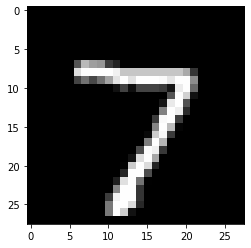

In [0]:
from matplotlib import pyplot as plt

first_image = x_test[0]

plt.imshow(first_image, cmap='gray')
plt.show()

normalize x values

In [0]:
x_train_normalized, x_test_normalized = x_train / 255, x_test / 255
print(x_train_normalized[5, 5])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05098039 0.09803922 0.39215686
 0.47843137 0.02745098 0.         0.         0.         0.
 0.         0.         0.         0.        ]


make a sequential model with a dense input layer with shape (28, 28),
a hiden layer,
a dropout layer to lower overfitting, 
a hidden layer and a output dense layer with 10 units

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(units = 125, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=10)
])

make a loss fc

In [0]:
loss_fc = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [0]:
model.compile(optimizer="adam", loss=loss_fc, metrics=["accuracy"])

train the model - minimize the loss

In [0]:
model.fit(x = x_train_normalized, y = y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2646 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1179 - accuracy: 0.9655
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0794 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0587 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0451 - accuracy: 0.9863


evaluate model

In [0]:
model.evaluate(x_test_normalized, y_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9762


[0.07512331753969193, 0.9761999845504761]